In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import time
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Deepression/Deepression.csv');
#dataset = pd.read_csv('/content/gdrive/My Drive/Faculdade/Inteligência Artificial e Computacional/Projeto 2/Deepression.csv');
dataset = dataset.dropna()
dataset['Depression State'] = dataset['Depression State'].str.strip().replace({
    '\tModerate': 'Moderate',
   '\tMild': 'Mild',
   '\tNo depression': 'No depression',
   '\tSevere': 'Severe',
   '2\tNo depression': 'No depression',
   '5\tNo depression': 'No depression'
})
dataset.drop(columns=['Number '] , inplace= True)

dataset.describe()

Mounted at /content/gdrive


,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.00000,491.000000,491.000000,491.000000,491.000000,491.00000,491.000000
mean,2.920570,2.790224,2.798371,2.961303,2.959267,2.786151,2.961303,2.96334,2.804481,2.971487,2.973523,2.959267,2.96334,2.920570
std,1.733171,1.674169,1.680038,1.727488,1.736279,1.674872,1.722756,1.73284,1.663062,1.725913,1.717055,1.724485,1.73284,1.723725
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
max,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.00000,5.000000,6.000000,6.000000,6.000000,6.00000,6.000000


In [13]:
depression_counts = dataset['Depression State'].value_counts()
print(depression_counts)

total_records = len(dataset)
print(f"\nQuantidade total de registros: {total_records}")

Depression State
No depression    157
Mild             117
Moderate         109
Severe           108
Name: count, dtype: int64

Quantidade total de registros: 491


In [5]:
Z = pd.get_dummies(dataset, drop_first=False)
Z

X = Z[Z.columns[:14]]
X

Y = Z[Z.columns[14:18]]
Y

,Depression State_Mild,Depression State_Moderate,Depression State_No depression,Depression State_Severe
0,True,False,False,False
1,False,True,False,False
2,False,False,False,True
3,False,False,True,False
4,False,True,False,False
...,...,...,...,...
535,True,False,False,False
536,False,False,False,True
537,False,False,True,False
538,False,False,False,True


In [6]:
def print_metrics(y_test, y_pred, training_time, classifier_name):
    print(f"Métricas para {classifier_name}:")
    print(f"Tempo de Treinamento: {training_time:.2f} segundos")
    print("Acurácia:", metrics.accuracy_score(y_test, y_pred))
    print("Precisão:", metrics.precision_score(y_test, y_pred, average='macro'))
    print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print("F1-Score:", metrics.f1_score(y_test, y_pred, average='macro'))

    # Calcular métricas por classe
    report = metrics.classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), target_names=Y.columns, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    best_class = report_df.iloc[:-3]['f1-score'].idxmax()
    worst_class = report_df.iloc[:-3]['f1-score'].idxmin()

    print(f"\nMelhor classe: {best_class}")
    print(report_df.loc[best_class])
    print(f"\nPior classe: {worst_class}")
    print(report_df.loc[worst_class])

    #Matriz de confusão
    print("\nMatriz de Confusão:")
    cm = metrics.confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Y.columns, yticklabels=Y.columns)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("\n")

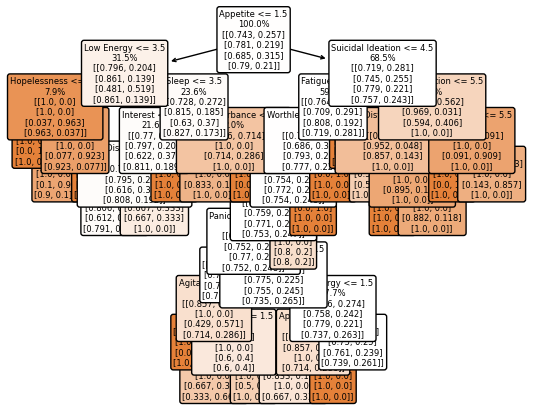

In [7]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

# Cria o objeto de um classificador de Árvore de Decisão
clf_dt = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)
# Executa o treinamento (fit)
clf_dt = clf_dt.fit(X_train,y_train)

tree.plot_tree(clf_dt, rounded=True, feature_names=X.columns, fontsize=6, class_names=['Depression State_Moderate',	'Depression State_No depression',	'Depression State_Severe'], proportion=True, impurity=False, filled=True, label='none')

y_pred_dt = clf_dt.predict(X_test)
training_time_dt = time.time() - start_time

Métricas para Decision Tree Classifier:
Tempo de Treinamento: 0.15 segundos
Acurácia: 0.2905405405405405
Precisão: 0.8709150326797386
Recall: 0.29620037670240507
F1-Score: 0.43015048978708936

Melhor classe: Depression State_No depression
precision     0.777778
recall        0.285714
f1-score      0.417910
support      49.000000
Name: Depression State_No depression, dtype: float64

Pior classe: Depression State_Mild
precision     0.238938
recall        0.931034
f1-score      0.380282
support      29.000000
Name: Depression State_Mild, dtype: float64

Matriz de Confusão:


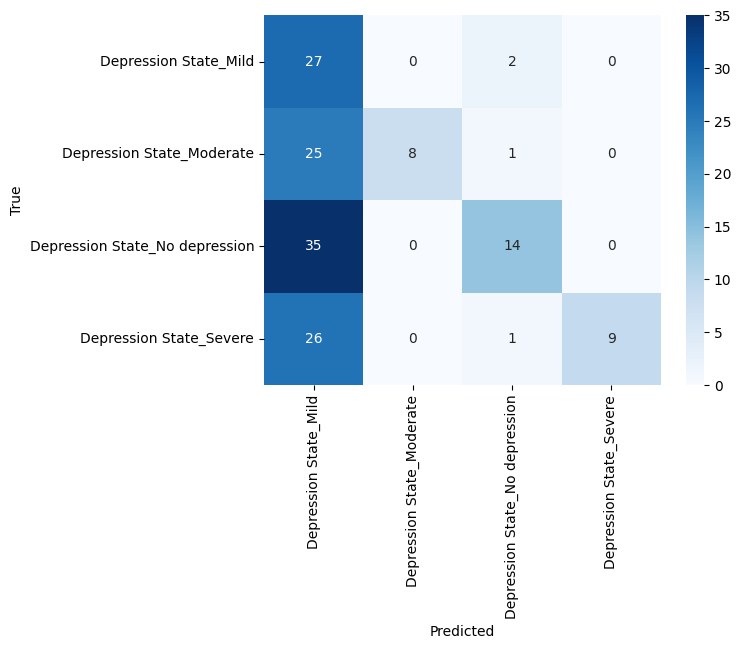

In [8]:
print_metrics(y_test, y_pred_dt, training_time_dt, "Decision Tree Classifier")

In [9]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

# Cria o objeto de um classificador de Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Executa o treinamento (fit)
clf_rf = clf_rf.fit(X_train,y_train)

y_pred_rf = clf_rf.predict(X_test)
training_time_rf = time.time() - start_time

Métricas para Random Forest Classifier:
Tempo de Treinamento: 0.20 segundos
Acurácia: 0.28378378378378377
Precisão: 0.7639423076923078
Recall: 0.2722340838509317
F1-Score: 0.38648772517136937

Melhor classe: Depression State_No depression
precision     0.730769
recall        0.413043
f1-score      0.527778
support      46.000000
Name: Depression State_No depression, dtype: float64

Pior classe: Depression State_Moderate
precision     1.000000
recall        0.171429
f1-score      0.292683
support      35.000000
Name: Depression State_Moderate, dtype: float64

Matriz de Confusão:


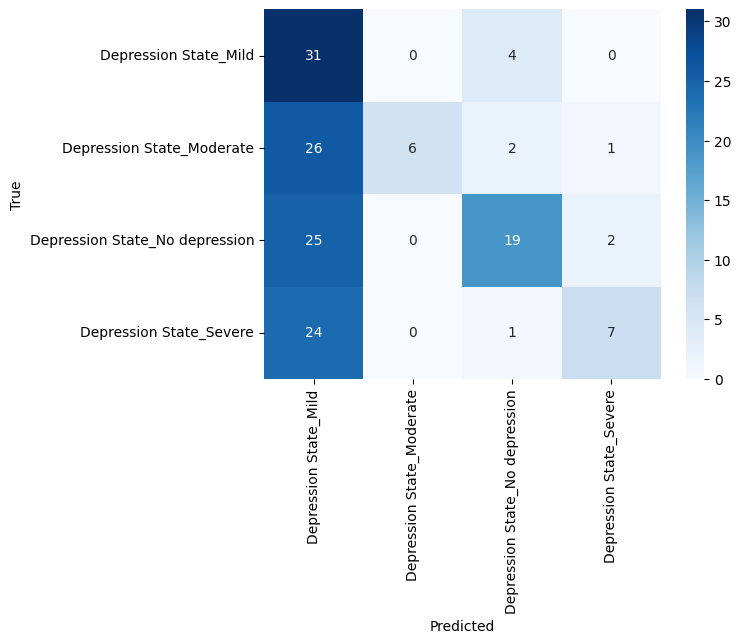

In [10]:
print_metrics(y_test, y_pred_rf, training_time_rf, "Random Forest Classifier")

In [11]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

# Cria o objeto de um classificador de KNN
clf_knn = KNeighborsClassifier(n_neighbors=3)
# Executa o treinamento (fit)
clf_knn = clf_knn.fit(X_train,y_train)

y_pred_knn = clf_knn.predict(X_test)
training_time_knn = time.time() - start_time

Métricas para K-Nearest Neighbors Classifier:
Tempo de Treinamento: 0.06 segundos
Acurácia: 0.41216216216216217
Precisão: 0.6663457049486461
Recall: 0.42548758878538295
F1-Score: 0.40985522187692375

Melhor classe: Depression State_Mild
precision     0.407407
recall        0.628571
f1-score      0.494382
support      35.000000
Name: Depression State_Mild, dtype: float64

Pior classe: Depression State_Severe
precision     1.000000
recall        0.172414
f1-score      0.294118
support      29.000000
Name: Depression State_Severe, dtype: float64

Matriz de Confusão:


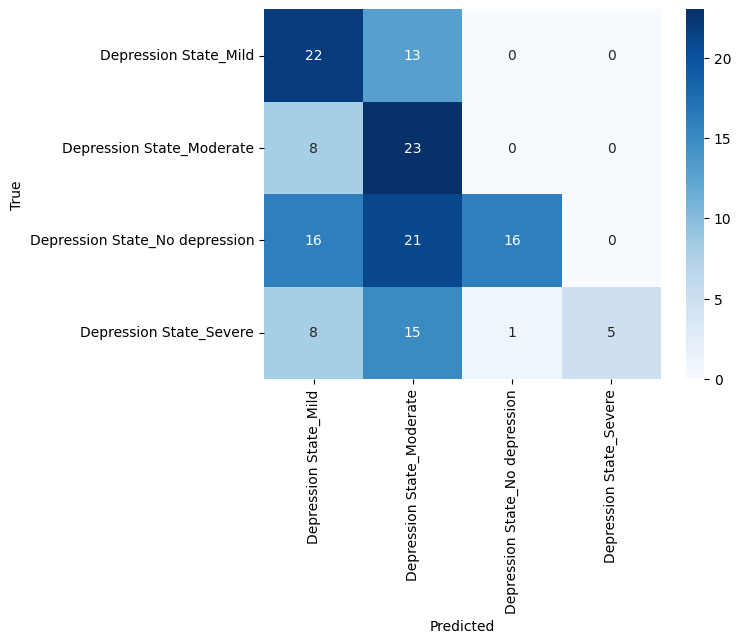

In [12]:
print_metrics(y_test, y_pred_knn, training_time_knn, "K-Nearest Neighbors Classifier")